In [ ]:
%matplotlib inline


# Factor Analysis (with rotation) to visualize patterns

Investigating the Iris dataset, we see that sepal length, petal
length and petal width are highly correlated. Sepal width is
less redundant. Matrix decomposition techniques can uncover
these latent patterns. Applying rotations to the resulting
components does not inherently improve the predictive value
of the derived latent space, but can help visualise their
structure; here, for example, the varimax rotation, which
is found by maximizing the squared variances of the weights,
finds a structure where the second component only loads
positively on sepal width.


In [1]:
# Authors: Jona Sassenhagen
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

Load Iris data



In [2]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]

Plot covariance of Iris features



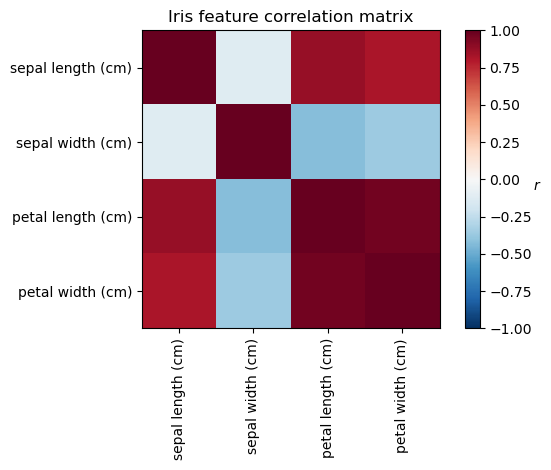

In [3]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

Run factor analysis with Varimax rotation





 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


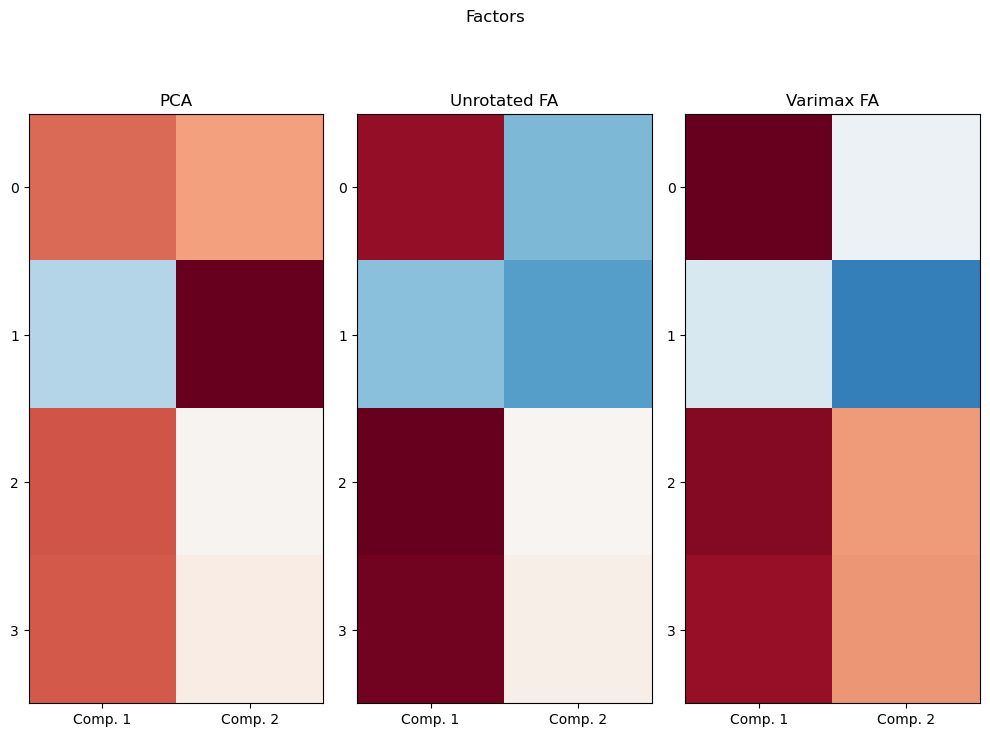

In [5]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    #if ax.is_first_col():
    #    ax.set_yticklabels(feature_names)
    #else:
    #    ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()